In [34]:
!pip install TableOne

# Install packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math 
import statistics
import scipy.stats
from tableone import TableOne
import scipy.stats
from statsmodels.formula.api import ols
import patsy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
df_sparcs = pd.read_csv('https://health.data.ny.gov/resource/gnzp-ekau.csv')
df_sparcs.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,N,3913.23,3466.83
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,0,N,Y,3597.10,3746.80
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Federal/State/Local/VA,NaN,0,N,Y,9149.22,8322.10
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,5880.61,5828.87
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,7019.76,6604.00


In [11]:
# Now we can look at data types, shape, and column names
df_sparcs.dtypes, df_sparcs.shape, df_sparcs.columns

(health_service_area                     object
 hospital_county                         object
 operating_certificate_number           float64
 facility_id                            float64
 facility_name                           object
 age_group                               object
 zip_code_3_digits                       object
 gender                                  object
 race                                    object
 ethnicity                               object
 length_of_stay                           int64
 type_of_admission                       object
 patient_disposition                     object
 discharge_year                           int64
 ccs_diagnosis_code                       int64
 ccs_diagnosis_description               object
 ccs_procedure_code                       int64
 ccs_procedure_description               object
 apr_drg_code                             int64
 apr_drg_description                     object
 apr_mdc_code                           

In [13]:
df_sparcs.mean, df_sparcs.var, df_sparcs.describe

(<bound method NDFrame._add_numeric_operations.<locals>.mean of     health_service_area hospital_county  operating_certificate_number  \
 0            Western NY        Allegany                      226700.0   
 1            Western NY        Allegany                      226700.0   
 2            Western NY        Allegany                      226700.0   
 3            Western NY        Allegany                      226700.0   
 4            Western NY        Allegany                      226700.0   
 ..                  ...             ...                           ...   
 995          Western NY        Allegany                      228000.0   
 996          Western NY        Allegany                      228000.0   
 997          Western NY        Allegany                      228000.0   
 998                 NaN             NaN                           NaN   
 999          Western NY        Allegany                      228000.0   
 
      facility_id                              

In [19]:
# Can look at relationship between age group and diagnosis code 
age_diag = ols('ccs_diagnosis_code ~ age_group + 1', df_sparcs).fit()
print(age_diag.summary())

                            OLS Regression Results                            
Dep. Variable:     ccs_diagnosis_code   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     50.29
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.38e-38
Time:                        05:57:19   Log-Likelihood:                -5885.8
No. Observations:                1000   AIC:                         1.178e+04
Df Residuals:                     995   BIC:                         1.181e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [21]:
# Relationship between length of stay and severity of illness
stay_illness = ols('length_of_stay ~ apr_severity_of_illness_code + 1', df_sparcs).fit()
print(stay_illness.summary())

                            OLS Regression Results                            
Dep. Variable:         length_of_stay   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     340.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.23e-65
Time:                        06:00:48   Log-Likelihood:                -2342.3
No. Observations:                1000   AIC:                             4689.
Df Residuals:                     998   BIC:                             4698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [22]:
scipy.stats.linregress(df_sparcs['length_of_stay'],df_sparcs['apr_severity_of_illness_code'])

LinregressResult(slope=0.15070525123619527, intercept=1.307669704240071, rvalue=0.5043410743214227, pvalue=1.23131988367014e-65, stderr=0.00816776808373468, intercept_stderr=0.036869127805388834)

In [24]:
# Average charges by age group and type of admission
table1 = pd.pivot_table(df_sparcs, values = 'total_charges', index = ['age_group'],
                       columns = ['type_of_admission'], aggfunc = np.average)
np.round(table1)

type_of_admission,Elective,Emergency,Newborn,Urgent
age_group,,,,
0 to 17,7652.0,9646.0,3595.0,9779.0
18 to 29,9799.0,13400.0,NaN,9197.0
30 to 49,9845.0,13352.0,NaN,9020.0
50 to 69,21205.0,21322.0,NaN,14071.0
70 or Older,19659.0,17494.0,NaN,11464.0


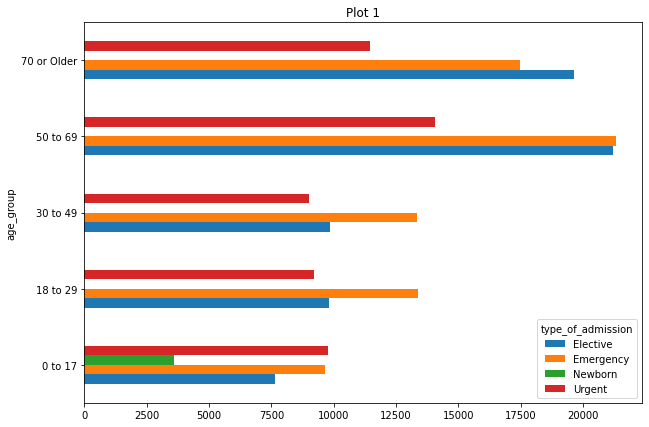

In [25]:
table1.plot.barh(figsize=(10,7),title='Plot 1') 

In [27]:
# Show frequency of APR severity of illness by age
table2 = pd.crosstab(df_sparcs['age_group'], df_sparcs['apr_severity_of_illness_description'])
table2

apr_severity_of_illness_description,Extreme,Major,Minor,Moderate
age_group,,,,
0 to 17,0,3,186,34
18 to 29,2,7,116,44
30 to 49,1,9,75,33
50 to 69,17,64,43,84
70 or Older,16,117,25,124


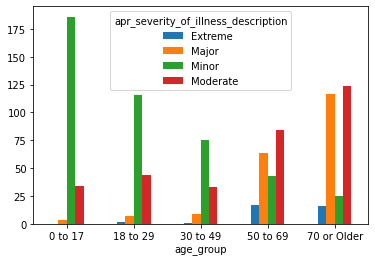

In [28]:
plot2 = table2.plot.bar(rot=0)

In [30]:
# Looking at relationship between length of stay and age group
table3 = df_sparcs.groupby('age_group')['length_of_stay'].describe()
table3

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0 to 17,223.0,2.174888,1.178217,1.0,1.0,2.0,3.0,12.0
18 to 29,169.0,2.384615,1.139131,1.0,2.0,2.0,3.0,9.0
30 to 49,118.0,2.508475,1.545580,1.0,2.0,2.0,3.0,11.0
50 to 69,208.0,5.052885,4.205137,1.0,3.0,4.0,6.0,27.0
70 or Older,282.0,4.294326,3.065461,1.0,2.0,4.0,6.0,20.0


In [36]:
# Using Tableone package for Tableone summary statistics
columns = ['age_group','gender','type_of_admission','length_of_stay','total_charges','total_costs']
categorical = ['age_group','gender','type_of_admission']

table4 = TableOne(df_sparcs,columns=columns,categorical=categorical)
table4

Missing            Overall
n                                                           1000
age_group, n (%)          0 to 17           0         223 (22.3)
                          18 to 29                    169 (16.9)
                          30 to 49                    118 (11.8)
                          50 to 69                    208 (20.8)
                          70 or Older                 282 (28.2)
gender, n (%)             F                 0         621 (62.1)
                          M                           379 (37.9)
type_of_admission, n (%)  Elective          0         251 (25.1)
                          Emergency                   439 (43.9)
                          Newborn                     200 (20.0)
                          Urgent                      110 (11.0)
length_of_stay, mean (SD)                   0          3.4 (2.9)
total_charges, mean (SD)                    0  12954.4 (12228.6)
total_costs, mean (SD)                      0  10103.5 (12149.5)

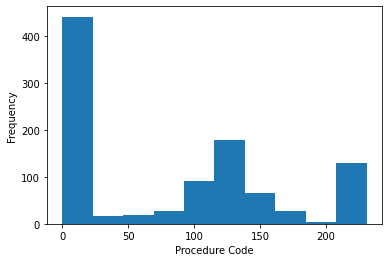

In [37]:
# Histogram to see the frequency counts of procedure codes
hist, bin_edges = np.histogram(df_sparcs['ccs_procedure_code'], bins=10)
hist
bin_edges

fig, ax = plt.subplots()
ax.hist(df_sparcs['ccs_procedure_code'], bin_edges, cumulative=False)
ax.set_xlabel('Procedure Code')
ax.set_ylabel('Frequency')
plt.show()